# Comparison between generated datasets before and after run_lv_fix

In [1]:
# packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
# get master datasets

master_datasets = [i for i in os.listdir("master_datasets") if "master_dataset" in i]

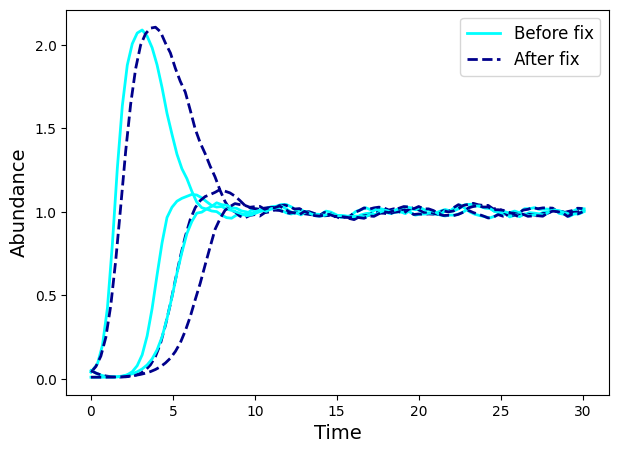

In [3]:
# plot datasets before and after fix

n = 0 # example dataset number
df_master = pd.read_csv(f"master_datasets/master_dataset_{n}.csv", index_col=0)
df_master_fix = pd.read_csv(f"master_datasets_run_lv_fix/master_dataset_{n}.csv", index_col=0)

plt.figure(figsize=(7, 5))

for i in range(df_master.n_species[0]):
    if i == 0:
        plt.plot(df_master.time, df_master[f"species_{i}"], c="cyan", lw=2, label="Before fix")
        plt.plot(df_master_fix.time, df_master_fix[f"species_{i}"], ls="--", c="darkblue", lw=2, label="After fix")
    else:
        plt.plot(df_master.time, df_master[f"species_{i}"], c="cyan", lw=2)
        plt.plot(df_master_fix.time, df_master_fix[f"species_{i}"], ls="--", c="darkblue", lw=2)
plt.legend(fontsize=12)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Abundance", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

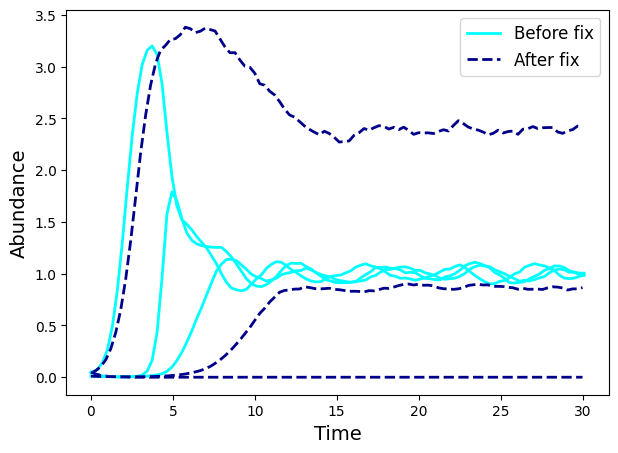

In [4]:
# another example, now changing survival outcome for one of the species

n = 300 # other dataset
df_master = pd.read_csv(f"master_datasets/master_dataset_{n}.csv", index_col=0)
df_master_fix = pd.read_csv(f"master_datasets_run_lv_fix/master_dataset_{n}.csv", index_col=0)

plt.figure(figsize=(7, 5))

for i in range(df_master.n_species[0]):
    if i == 0:
        plt.plot(df_master.time, df_master[f"species_{i}"], c="cyan", lw=2, label="Before fix")
        plt.plot(df_master_fix.time, df_master_fix[f"species_{i}"], ls="--", c="darkblue", lw=2, label="After fix")
    else:
        plt.plot(df_master.time, df_master[f"species_{i}"], c="cyan", lw=2)
        plt.plot(df_master_fix.time, df_master_fix[f"species_{i}"], ls="--", c="darkblue", lw=2)
plt.legend(fontsize=12)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Abundance", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

---

## Number of files which didn't have extinctions before the fix and do have after

In [5]:
zeros_in_fix_not_in_orig = []

for i in tqdm(range(len(master_datasets))):
    df_master = pd.read_csv(f"master_datasets/master_dataset_{i}.csv", index_col=0)
    df_master_fix = pd.read_csv(f"master_datasets_run_lv_fix/master_dataset_{i}.csv", index_col=0)
    
    if 0 not in df_master[[i for i in df_master.columns if "species_" in i]].values and 0 in df_master_fix[[i for i in df_master.columns if "species_" in i]].values:
        zeros_in_fix_not_in_orig.append(i)
        
print(f"Extinctions that appear in the master datasets after the fix and not before: {len(zeros_in_fix_not_in_orig)}/{len(master_datasets)}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1050/1050 [00:04<00:00, 210.92it/s]

Extinctions that appear in the master datasets after the fix and not before: 24/1050


## Now the opposite: extinctions shown before the fix that don't appear after

In [6]:
zeros_in_fix_not_in_orig = []

for i in tqdm(range(len(master_datasets))):
    df_master = pd.read_csv(f"master_datasets/master_dataset_{i}.csv", index_col=0)
    df_master_fix = pd.read_csv(f"master_datasets_run_lv_fix/master_dataset_{i}.csv", index_col=0)
    
    if 0 in df_master[[i for i in df_master.columns if "species_" in i]].values and 0 not in df_master_fix[[i for i in df_master.columns if "species_" in i]].values:
        zeros_in_fix_not_in_orig.append(i)
        
print(f"Extinctions that appear in the master datasets before the fix and not after: {len(zeros_in_fix_not_in_orig)}/{len(master_datasets)}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1050/1050 [00:04<00:00, 219.75it/s]

Extinctions that appear in the master datasets before the fix and not after: 27/1050
